In [1]:

import sys
# install pipreqs
!{sys.executable} -m pip install -q pipreqs

# run:  pipreqs which generates a requirements.txt
# uses project path (where the notebook is)
path=%pwd
print(path)
!{sys.executable} "/Users/jpyrett/opt/miniconda3/envs/ptc/bin/pipreqs" .  --force

!{sys.executable} -m pip install -r ./requirements.txt -q 
 

# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

/Users/jpyrett/courses/udacity/AI/Charting
INFO: Successfully saved requirements file in ./requirements.txt


Once again, we make use of the Pokémon data for this exercise.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

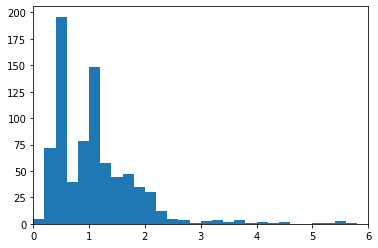

In [3]:
pokemon['height'].describe()
# min 0.1  , max = 14.5

bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data=pokemon, x = 'height', bins = bins, rwidth = 2);
plt.xlim((0,6));

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


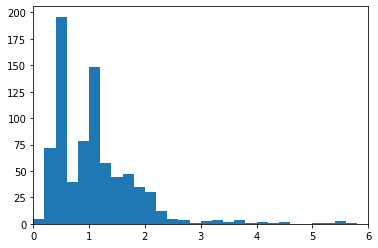

In [4]:
# run this cell to check your work against ours
scales_solution_1()

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

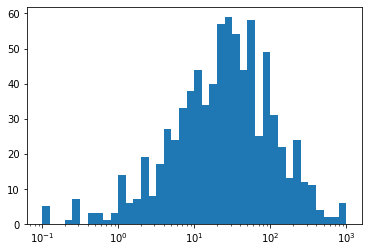

In [5]:
# weights
pokemon['weight'].describe()
# min 0.1  , max = 1000

np.log10(pokemon['weight'].describe())


bins = 10 ** np.arange(-1,3+0.1, 0.1)
plt.hist(data=pokemon, x = 'weight', bins = bins);
plt.xscale('log');

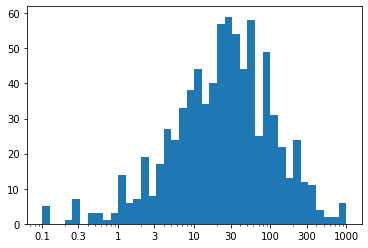

In [6]:
# add better labels  (log10 labels)
pokemon['weight'].describe()
# min 0.1  , max = 1000
#np.log10(pokemon['weight'].describe())


bins = 10 ** np.arange(-1,3+0.1, 0.1)
# new - hardcoded
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

# new 
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=pokemon, x = 'weight', bins = bins);
plt.xscale('log');

# new 
plt.xticks(ticks, labels);



Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


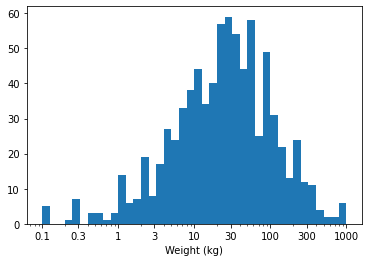

In [7]:
# run this cell to check your work against ours
scales_solution_2()